# Lasso Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [2]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

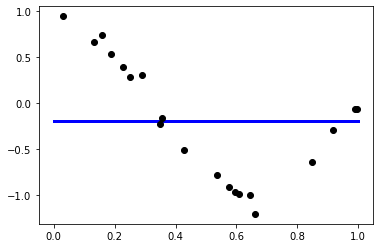

In [3]:
clf = Lasso(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


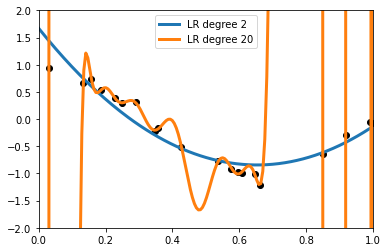

In [32]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (ElasticNet Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

[('LR degree 20',
  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('linearregression', LinearRegression())])),
 ('ElasticNet alpha=1',
  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('elasticnet', ElasticNet(alpha=1))])),
 ('ElasticNet alpha=10e4',
  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('elasticnet', ElasticNet(alpha=100000.0))])),
 ('ElasticNet alpha=1e-4',
  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('elasticnet', ElasticNet(alpha=0.0001))]))]
LR degree 20
ElasticNet alpha=1
ElasticNet alpha=10e4
ElasticNet alpha=1e-4


/home/kuba/anaconda3/envs/foai/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009069070622305164, tolerance: 0.0008401173008436095
  model = cd_fast.enet_coordinate_descent(


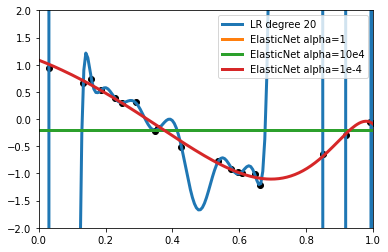

In [39]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
names, predicts, models = [], [], []
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(degree=20), linear_model.LinearRegression())))
models.append(('ElasticNet alpha=1', make_pipeline(PolynomialFeatures(degree=20), ElasticNet(alpha=1))))
models.append(('ElasticNet alpha=10e4', make_pipeline(PolynomialFeatures(degree=20), ElasticNet(alpha=10e4))))
models.append(('ElasticNet alpha=1e-4', make_pipeline(PolynomialFeatures(degree=20), ElasticNet(alpha=1e-4))))
pprint(models)
x_plot = np.vstack(np.linspace(-3, 3, 1000))

for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [41]:
grid = GridSearchCV(estimator=make_pipeline(PolynomialFeatures(degree=2),Lasso()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7], 'lasso__alpha': [1, 10000, 0.1]},
                    cv=5,
                    refit=False)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(x, y)
print(grid.best_params_)

{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 1}


# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [43]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [46]:
import warnings
warnings.filterwarnings('ignore')

grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1)),
param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5],
'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]},
cv=5,
refit=True)
grid.fit(X, y)
grid.best_params_

from sklearn import metrics
metrics.r2_score(y, grid.best_estimator_.predict(X))

0.9914869731209236